In [1]:
import torch
from torchvision import datasets

from matplotlib import pyplot as plt
import numpy as np

torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

In [2]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [3]:
from torchvision import datasets, transforms
datapath = '..\C7'
cifar10 = datasets.CIFAR10(
    datapath, train=True, download=False,
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [4]:
cifar10_val = datasets.CIFAR10(
    datapath, train=False, download=False, # train = False then val_set is downloaded
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ]))

In [5]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [6]:
import torch.nn as nn

softmax = nn.Softmax(dim=1) # along rows

x = torch.tensor([[1.0, 2.0, 3.0],
                 [1.0, 2.0, 3.0]])
softmax(x)            

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [7]:
# understanding softmax

def softmax(x):
    return torch.exp(x) / torch.exp(x).sum()

x = torch.tensor([1.0, 2.0, 3.0])
softmax(x), softmax(x).sum()

(tensor([0.0900, 0.2447, 0.6652]), tensor(1.))

In [8]:
n_out = 2 # number of output classes i.e birds or airplane

model = nn.Sequential(
    nn.Linear( # first input layer
        3072, # 3x32x32 = 3072
        512, # hidden layer
    ),
    nn.Tanh(), # activation function
    nn.Linear(
        512, # hidden layer
        n_out, # output layer
    ),
    nn.LogSoftmax(dim=1) # as nn.NLLloss is used. logsoftmax is used instead of softmax
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


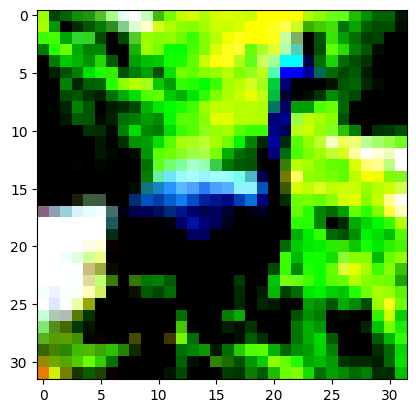

In [9]:
img, _ = cifar2[0]

plt.imshow(img.permute(1,2,0))
plt.show()

Summing up, our loss for classification can be computed as follows. For each sample in the batch:
- Run the forward pass, and obtain the output values from the last (linear) layer.
- Compute their softmax, and obtain probabilities.
- Take the predicted probability corresponding to the correct class (the likelihood of the parameters). Note that we know what the correct class is because it’s a supervised problem—it’s our ground truth.
- Compute its logarithm, slap a minus sign in front of it, and add it to the loss.

In [11]:
import torch.optim as optim

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 5


# not training in batches will take too much time and evaluation of each loss that backpropagates is not appropriate
for epoch in range(n_epochs):
    for img, label in cifar2:
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Printing the loss of only the last image
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    

Epoch: 0, Loss: 7.046943
Epoch: 1, Loss: 1.872851
Epoch: 2, Loss: 5.895400
Epoch: 3, Loss: 2.943361
Epoch: 4, Loss: 11.279670


In [19]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for imgs, labels in train_loader: # imgs is a tensor of size (64 x 3 x 32 x32), labels a tensor of size
        outputs = model(imgs.view(imgs.shape[0], -1)) # 64 x 3072
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss))) # prints loss of random batch

Epoch: 0, Loss: 0.374087
Epoch: 1, Loss: 0.678669
Epoch: 2, Loss: 0.642162
Epoch: 3, Loss: 0.531003
Epoch: 4, Loss: 0.480707


In [20]:
# nn.NLLLoss() + nn.LogSoftmax() = nn.CrossEntropyLoss()

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

loss_fn = nn.CrossEntropyLoss()

In [21]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 5

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.307775
Epoch: 1, Loss: 0.831813
Epoch: 2, Loss: 0.436497
Epoch: 3, Loss: 0.459527
Epoch: 4, Loss: 0.267532


In [27]:
# find the number of parameters

numel_list = [p.numel()
                for p in model.parameters()
                if p.requires_grad == True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

1.
- Input features = 3072 (1 neuron for each feature)
- Output features = 1024 (1 for each neuron in 2nd layer)
- For fully connected layer = each neuron connected to successive layer = 3072 x 1024 = 3145728
- Adding bias after multiplication on each output neuron = 1024 

2.
- weights = 1024 x 512 = 524288
- bias = 512

3.
- weight = 512 x 128 = 65536
- bias = 128

4.
- weight = 128 x 2 = 512
- bias = 2

- This is very large for even a small image that's why CNN is used!